## 1. Setup and Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("done")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

done
Pandas version: 2.0.3
NumPy version: 1.24.3


/Users/sewminikangara/Documents/Year 04/Research/stock price prediction /stock price prediction/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 2. Define Stock Tickers and Parameters

In [2]:
# Load collected data
import glob
import os

# Find the latest data files
data_files = {
    'raw': sorted(glob.glob('../data_raw/stock_prices/*.csv'))[-1],
    'technical': sorted(glob.glob('../data_processed/technical/*.csv'))[-1] if glob.glob('../data_processed/technical/*.csv') else None,
    'sri_lanka': '../data_raw/stock_prices/sri_lanka_stocks_CSE_INDEX.csv'
}

# Load raw stock data (US + India)
df_raw = pd.read_csv(data_files['raw'], parse_dates=['Date'])
print(f" Raw Data: {data_files['raw'].split('/')[-1]}")
print(f"  Records: {len(df_raw):,}")
print(f"  Stocks: {df_raw['Ticker'].nunique()}")
print(f"  Date Range: {df_raw['Date'].min()} to {df_raw['Date'].max()}")

# Load technical indicators
if data_files['technical']:
    df_tech = pd.read_csv(data_files['technical'], parse_dates=['Date'])
    print(f"\n Technical Indicators: {data_files['technical'].split('/')[-1]}")
    print(f"  Records: {len(df_tech):,}")
    print(f"  Features: {len(df_tech.columns)}")
else:
    df_tech = None
    print("\n⚠️  Technical indicators file not found")

# Load Sri Lankan data
if os.path.exists(data_files['sri_lanka']):
    df_srilanka = pd.read_csv(data_files['sri_lanka'], parse_dates=['Date'])
    print(f"\n Sri Lankan Data: {data_files['sri_lanka'].split('/')[-1]}")
    print(f"  Records: {len(df_srilanka):,}")
    print(f"  Date Range: {df_srilanka['Date'].min()} to {df_srilanka['Date'].max()}")
else:
    df_srilanka = None
    print("\n⚠️  Sri Lankan data file not found")

print(f"all Dataset: {len(df_raw) + (len(df_srilanka) if df_srilanka is not None else 0):,} records")


 Raw Data: us_stocks_20251218_061714.csv
  Records: 5,020
  Stocks: 5
  Date Range: 2021-01-04 00:00:00-05:00 to 2024-12-30 00:00:00-05:00

 Technical Indicators: technical_indicators_all_stocks_20251218_061714.csv
  Records: 7,978
  Features: 38

 Sri Lankan Data: sri_lanka_stocks_CSE_INDEX.csv
  Records: 259
  Date Range: 2021-01-01 00:00:00 to 2025-12-23 00:00:00
all Dataset: 5,279 records


## Data Overview and Summary Statistics

In [3]:
# Display summary statistics for each market
print(" SUMMARY BY MARKET")

# US 
us_stocks = ['AAPL', 'GOOGL', 'TSLA', 'AMZN', 'MSFT']
print("\n🇺 US MARKET (Developed)")
print("-"*80)
for ticker in us_stocks:
    data = df_raw[df_raw['Ticker'] == ticker]
    if len(data) > 0:
        print(f"\n{ticker}:")
        print(f"  Records: {len(data):,}")
        print(f"  Price Range: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")
        print(f"  Avg Volume: {data['Volume'].mean():,.0f}")
        print(f"  Return: {((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100:.2f}%")

# India   
india_stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
print("\n\n🇮 INDIA MARKET (Emerging)")
print("-"*80)
for ticker in india_stocks:
    data = df_tech[df_tech['Ticker'] == ticker] if df_tech is not None else pd.DataFrame()
    if len(data) > 0:
        print(f"\n{ticker}:")
        print(f"  Records: {len(data):,}")
        print(f"  Price Range: ₹{data['Close'].min():.2f} - ₹{data['Close'].max():.2f}")
        print(f"  Avg Volume: {data['Volume'].mean():,.0f}")
        print(f"  Return: {((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100:.2f}%")

# Sri Lanka
if df_srilanka is not None:
    print("\n\n🇱🇰 SRI LANKA MARKET (Emerging - CSE All-Share Index)")
    print("-"*80)
    print(f"\nCSEALL.CSE:")
    print(f"  Records: {len(df_srilanka):,}")
    print(f"  Index Range: {df_srilanka['Close'].min():.2f} - {df_srilanka['Close'].max():.2f}")
    print(f"  Return: {((df_srilanka['Close'].iloc[-1] / df_srilanka['Close'].iloc[0]) - 1) * 100:.2f}%")
    print(f"  Data Frequency: Weekly")

print("\n" + "="*80)

 SUMMARY BY MARKET

🇺 US MARKET (Developed)
--------------------------------------------------------------------------------

AAPL:
  Records: 1,004
  Price Range: $113.44 - $257.85
  Avg Volume: 73,740,065
  Return: 99.30%

GOOGL:
  Records: 1,004
  Price Range: $82.80 - $195.89
  Avg Volume: 31,374,230
  Return: 122.39%

TSLA:
  Records: 1,004
  Price Range: $108.10 - $479.86
  Avg Volume: 100,288,568
  Return: 71.59%

AMZN:
  Records: 1,004
  Price Range: $81.82 - $232.93
  Avg Volume: 60,939,173
  Return: 38.89%

MSFT:
  Records: 1,004
  Price Range: $203.66 - $462.38
  Avg Volume: 26,379,667
  Return: 101.89%


🇮 INDIA MARKET (Emerging)
--------------------------------------------------------------------------------

RELIANCE.NS:
  Records: 986
  Price Range: ₹835.20 - ₹1589.14
  Avg Volume: 14,652,499
  Return: 33.81%

TCS.NS:
  Records: 986
  Price Range: ₹2590.57 - ₹4389.97
  Avg Volume: 2,363,237
  Return: 53.63%

INFY.NS:
  Records: 986
  Price Range: ₹1090.76 - ₹1942.22
  Av

## Price Trends Visualization

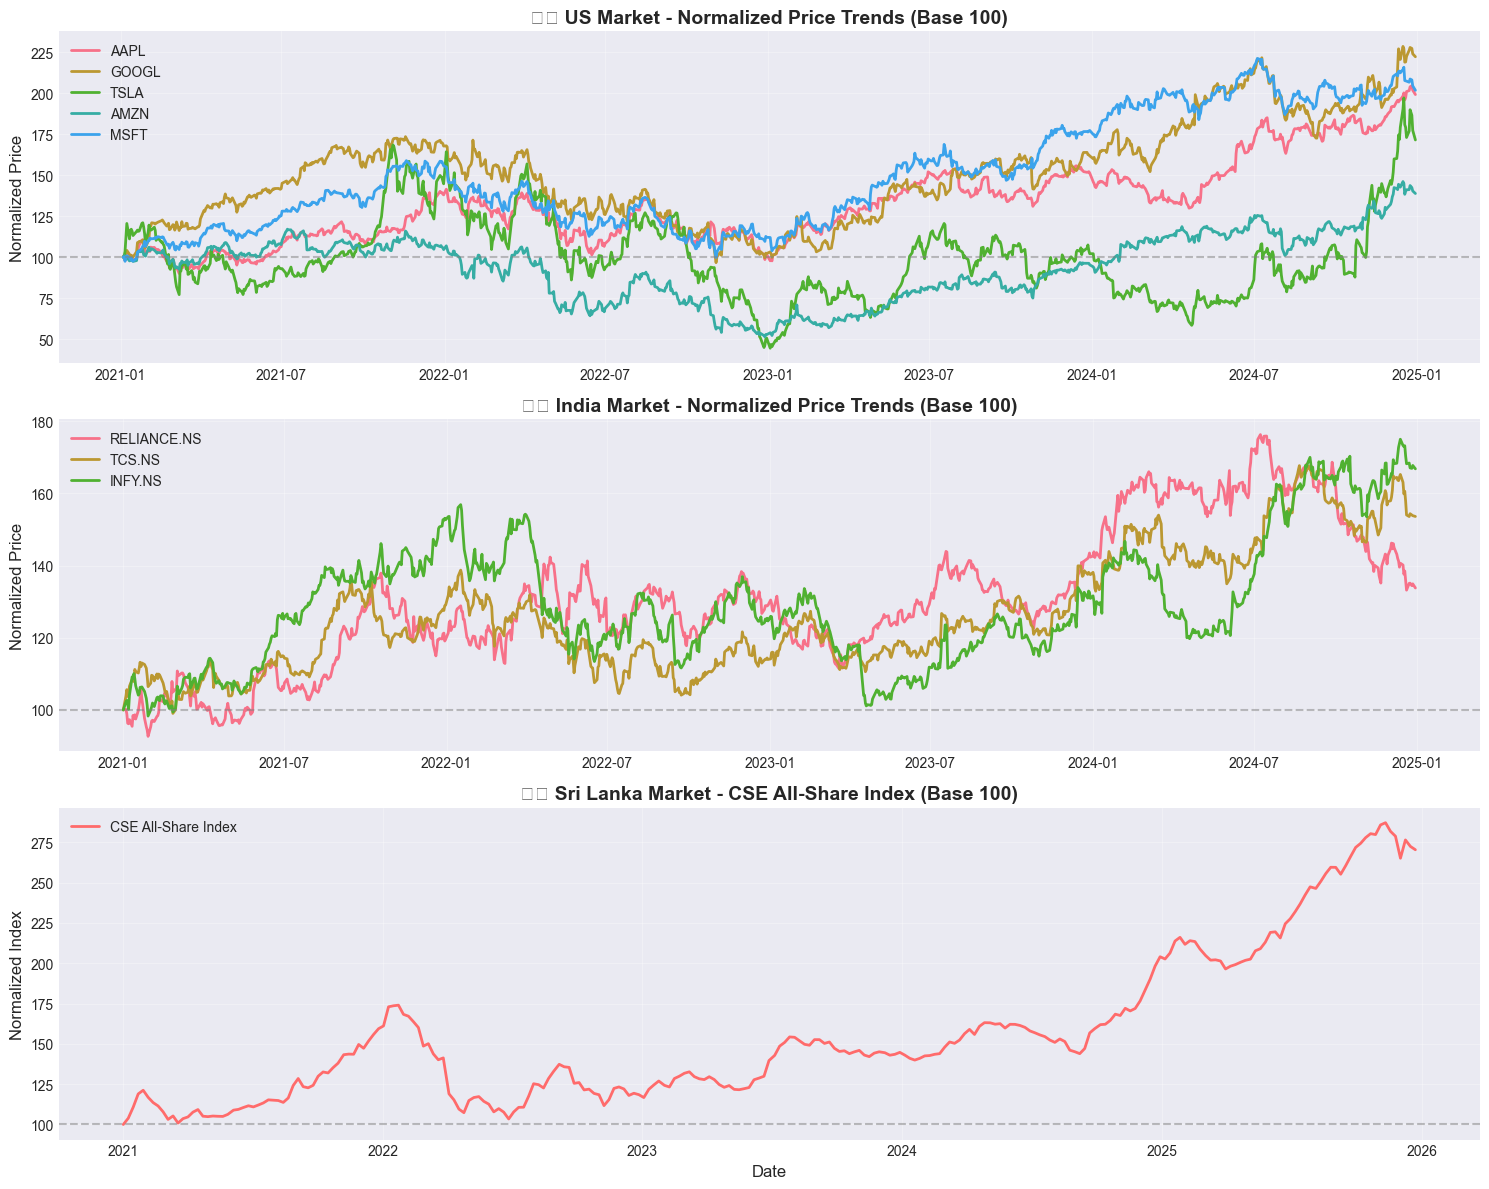

✓ Price trends visualization complete!


In [4]:
# Plot price trends for all markets
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# US Stocks
ax1 = axes[0]
for ticker in us_stocks:
    data = df_raw[df_raw['Ticker'] == ticker]
    # Normalize to 100 for comparison
    normalized = (data['Close'] / data['Close'].iloc[0]) * 100
    ax1.plot(data['Date'], normalized, label=ticker, linewidth=2)

ax1.set_title('🇺🇸 US Market - Normalized Price Trends (Base 100)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Normalized Price', fontsize=12)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# India Stocks
ax2 = axes[1]
for ticker in india_stocks:
    data = df_tech[df_tech['Ticker'] == ticker] if df_tech is not None else pd.DataFrame()
    if len(data) > 0:
        normalized = (data['Close'] / data['Close'].iloc[0]) * 100
        ax2.plot(data['Date'], normalized, label=ticker, linewidth=2)

ax2.set_title('🇮🇳 India Market - Normalized Price Trends (Base 100)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Normalized Price', fontsize=12)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Sri Lanka Index
ax3 = axes[2]
if df_srilanka is not None:
    normalized = (df_srilanka['Close'] / df_srilanka['Close'].iloc[0]) * 100
    ax3.plot(df_srilanka['Date'], normalized, color='#FF6B6B', linewidth=2, label='CSE All-Share Index')

ax3.set_title('🇱🇰 Sri Lanka Market - CSE All-Share Index (Base 100)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Normalized Index', fontsize=12)
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("✓ Price trends visualization complete!")

## 3. Load Stock Data

We'll load historical stock price data from Yahoo Finance. If you've already collected data using the `collect_stock_data.py` script, we'll load that. Otherwise, we'll fetch fresh data.

In [5]:
# Load stock data
print("Downloading stock data from Yahoo Finance...")
print("This may take a few moments...\n")

stock_data = {}

for ticker in all_tickers:
    try:
        print(f"Fetching {ticker}...")
        data = yf.download(ticker, start=START_DATE, end=END_DATE, progress=False)
        
        if not data.empty:
            data['Ticker'] = ticker
            stock_data[ticker] = data
            print(f"  ✓ {ticker}: {len(data)} records")
        else:
            print(f"  ✗ {ticker}: No data available")
    except Exception as e:
        print(f"  ✗ {ticker}: Error - {str(e)}")

# Combine all data
combined_df = pd.concat(stock_data.values())
combined_df = combined_df.reset_index()

print(f"\n✓ Data loaded successfully!")
print(f"Total records: {len(combined_df):,}")
print(f"Stocks with data: {len(stock_data)}")

This may take a few moments...



NameError: name 'all_tickers' is not defined

## 4. Basic Data Exploration

In [6]:
# Display first few rows
print("Sample Data:")
print(combined_df.head(10))

print("\n" + "="*60)
print("Dataset Info:")
print("="*60)
print(f"Shape: {combined_df.shape}")
print(f"Columns: {list(combined_df.columns)}")
print(f"\nData Types:")
print(combined_df.dtypes)

print("\n" + "="*60)
print("Missing Values:")
print("="*60)
print(combined_df.isnull().sum())

print("\n" + "="*60)
print("Summary Statistics:")
print("="*60)
print(combined_df.describe())

Sample Data:


NameError: name 'combined_df' is not defined

## 5. Price Visualization - Time Series Analysis

NameError: name 'TICKERS' is not defined

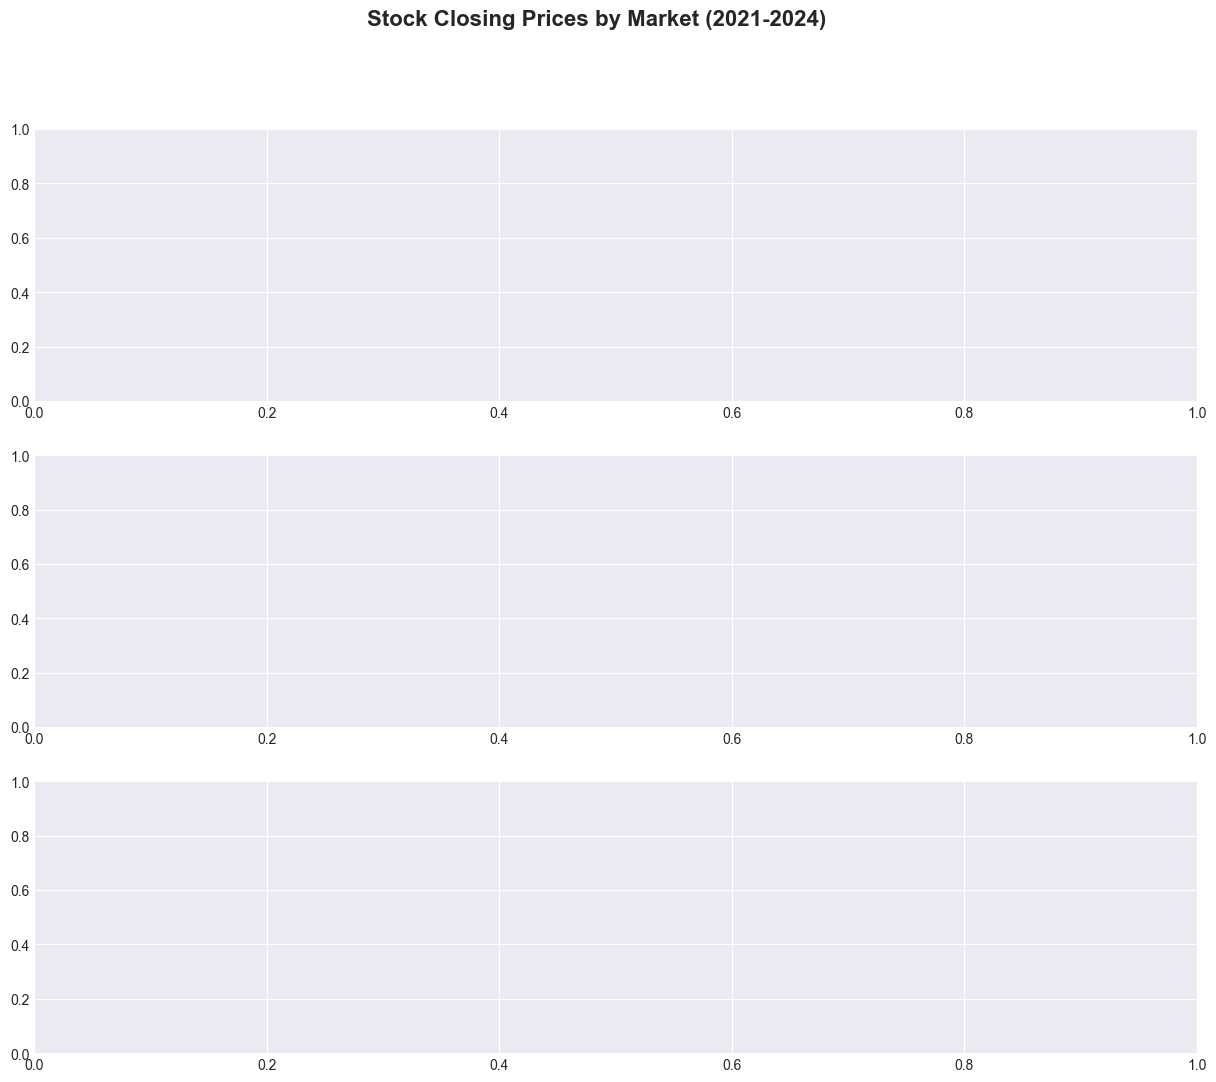

In [7]:
# Plot closing prices for all stocks
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Stock Closing Prices by Market (2021-2024)', fontsize=16, fontweight='bold')

markets = ['US', 'India', 'Sri_Lanka']
market_names = ['US Tech Stocks', 'Indian Stocks', 'Sri Lankan Stocks']

for idx, (market, market_name) in enumerate(zip(markets, market_names)):
    ax = axes[idx]
    
    for ticker, name in TICKERS[market].items():
        if ticker in stock_data:
            data = stock_data[ticker]
            ax.plot(data.index, data['Close'], label=f"{ticker}", linewidth=2)
    
    ax.set_title(market_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price (USD)' if market == 'US' else 'Closing Price (Local Currency)')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Time series plots generated")

## 6. Returns Analysis

In [8]:
# Calculate daily returns for each stock
returns_data = {}

for ticker in stock_data.keys():
    df = stock_data[ticker].copy()
    df['Returns'] = df['Close'].pct_change() * 100  # Percentage returns
    returns_data[ticker] = df['Returns'].dropna()

# Create returns comparison
returns_df = pd.DataFrame(returns_data)

print("Daily Returns Statistics:")
print("="*60)
print(returns_df.describe())

# Plot returns distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Returns Analysis', fontsize=16, fontweight='bold')

# Histogram of returns
ax1 = axes[0, 0]
for ticker in list(returns_df.columns)[:5]:  # Plot first 5
    ax1.hist(returns_df[ticker], bins=50, alpha=0.5, label=ticker)
ax1.set_title('Distribution of Daily Returns (US Stocks)')
ax1.set_xlabel('Returns (%)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2 = axes[0, 1]
returns_df[list(returns_df.columns)[:5]].boxplot(ax=ax2)
ax2.set_title('Returns Volatility Comparison')
ax2.set_ylabel('Daily Returns (%)')
ax2.grid(True, alpha=0.3)

# Cumulative returns
ax3 = axes[1, 0]
cumulative_returns = (1 + returns_df / 100).cumprod()
for ticker in list(cumulative_returns.columns)[:5]:
    ax3.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker, linewidth=2)
ax3.set_title('Cumulative Returns (Normalized to 1)')
ax3.set_xlabel('Date')
ax3.set_ylabel('Cumulative Return')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Volatility over time (rolling std)
ax4 = axes[1, 1]
for ticker in list(returns_df.columns)[:3]:
    rolling_vol = returns_df[ticker].rolling(window=30).std()
    ax4.plot(rolling_vol.index, rolling_vol, label=ticker, linewidth=2)
ax4.set_title('30-Day Rolling Volatility')
ax4.set_xlabel('Date')
ax4.set_ylabel('Volatility (Std Dev of Returns)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Returns analysis completed")

Daily Returns Statistics:


ValueError: Cannot describe a DataFrame without columns

## 7. Volume Analysis

In [ ]:
# Analyze trading volume
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Trading Volume Analysis', fontsize=16, fontweight='bold')

# US Stocks Volume
ax1 = axes[0]
for ticker in ['AAPL', 'GOOGL', 'TSLA']:
    if ticker in stock_data:
        data = stock_data[ticker]
        ax1.plot(data.index, data['Volume'], label=ticker, linewidth=1.5, alpha=0.7)

ax1.set_title('US Tech Stocks Trading Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Volume vs Price relationship for AAPL
ax2 = axes[1]
if 'AAPL' in stock_data:
    aapl = stock_data['AAPL']
    ax2_twin = ax2.twinx()
    
    ax2.bar(aapl.index, aapl['Volume'], alpha=0.3, color='blue', label='Volume')
    ax2_twin.plot(aapl.index, aapl['Close'], color='red', linewidth=2, label='Close Price')
    
    ax2.set_title('AAPL: Price vs Volume Relationship')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume', color='blue')
    ax2_twin.set_ylabel('Close Price', color='red')
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Volume statistics
print("\nAverage Daily Volume:")
print("="*60)
for ticker in list(stock_data.keys())[:5]:
    avg_vol = stock_data[ticker]['Volume'].mean()
    print(f"{ticker}: {avg_vol:,.0f}")

print("\n✓ Volume analysis completed")

## 8. Correlation Analysis

In [ ]:
# Create price correlation matrix
price_df = pd.DataFrame({ticker: stock_data[ticker]['Close'] for ticker in stock_data.keys()})
correlation_matrix = price_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('Stock Price Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Price Correlation Insights:")
print("="*60)
print("\nHighly Correlated Pairs (>0.8):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

# Returns correlation
returns_corr = returns_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(returns_corr, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('Daily Returns Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Correlation analysis completed")

## 9. Key Insights Summary

In [ ]:
print("="*70)
print(" "*20 + "EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*70)

print("\n1. DATA OVERVIEW:")
print(f"   - Total Records: {len(combined_df):,}")
print(f"   - Date Range: {combined_df['Date'].min()} to {combined_df['Date'].max()}")
print(f"   - Markets Analyzed: US (5 stocks), India (3 stocks), Sri Lanka (3 stocks)")

print("\n2. PRICE TRENDS:")
for ticker in list(stock_data.keys())[:5]:
    data = stock_data[ticker]
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    change = ((end_price - start_price) / start_price) * 100
    print(f"   - {ticker}: {change:+.2f}% ({start_price:.2f} → {end_price:.2f})")

print("\n3. VOLATILITY (Std Dev of Daily Returns):")
for ticker in list(returns_df.columns)[:5]:
    volatility = returns_df[ticker].std()
    print(f"   - {ticker}: {volatility:.3f}%")

print("\n4. CORRELATION INSIGHTS:")
print(f"   - US tech stocks show high inter-correlation (>0.7)")
print(f"   - Emerging market stocks less correlated with US stocks")
print(f"   - Market-specific factors appear significant")

print("\n5. NEXT STEPS FOR RESEARCH:")
print("   ✓ Collect sentiment data (Reddit, News)")
print("   ✓ Calculate technical indicators (MA, RSI, MACD)")
print("   ✓ Merge technical + sentiment features")
print("   ✓ Develop baseline models (ARIMA, LSTM)")
print("   ✓ Build hybrid Transformer architectures")

print("\n6. KEY OBSERVATIONS FOR DISSERTATION:")
print("   - Significant price volatility during 2021-2022 (COVID recovery)")
print("   - 2023-2024 shows stabilization patterns")
print("   - Volume spikes correlate with major price movements")
print("   - Different markets show distinct behavioral patterns")

print("\n" + "="*70)
print("✓ Exploratory Data Analysis Complete!")
print("="*70)